In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [2]:
# read the files
img_pred = pd.read_csv('image-predictions.tsv',sep='\t')
tw_arc = pd.read_csv('twitter-archive-enhanced.csv')
tw_j = pd.read_json('tweet_json.txt')

### Assess

1- Image Predictions
 

In [3]:
img_pred.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
1260,748705597323898880,https://pbs.twimg.com/ext_tw_video_thumb/74870...,1,tiger_shark,0.548497,False,great_white_shark,0.130252,False,scuba_diver,0.121887,False
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False
1673,813127251579564032,https://pbs.twimg.com/media/C0jO6aBWEAAM28r.jpg,1,Norwegian_elkhound,0.432416,True,whippet,0.374223,True,Siberian_husky,0.032463,True
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True


In [4]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [5]:
# Check duplication in tweet_id
img_pred[img_pred.tweet_id.duplicated(keep=False)]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [6]:
# Check duplication in tweet_id
img_pred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [7]:
img_pred[img_pred.p1_dog == True].p1.value_counts()
# img_pred.p1.value_counts()

golden_retriever               150
Labrador_retriever             100
Pembroke                        89
Chihuahua                       83
pug                             57
chow                            44
Samoyed                         43
toy_poodle                      39
Pomeranian                      38
malamute                        30
cocker_spaniel                  30
French_bulldog                  26
miniature_pinscher              23
Chesapeake_Bay_retriever        23
Staffordshire_bullterrier       20
Siberian_husky                  20
German_shepherd                 20
Cardigan                        19
Maltese_dog                     18
Eskimo_dog                      18
beagle                          18
Shetland_sheepdog               18
Lakeland_terrier                17
Rottweiler                      17
Shih-Tzu                        17
kuvasz                          16
Italian_greyhound               16
Great_Pyrenees                  14
West_Highland_white_

In [8]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [9]:
img_pred[img_pred.img_num > 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,0.048226,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
410,673887867907739649,https://pbs.twimg.com/media/CVoha_IU4AAZ7vi.jpg,2,Brabancon_griffon,0.216767,True,Chihuahua,0.190958,True,golden_retriever,0.163288,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True


2- Twitter Archive Enhanced

In [10]:
tw_arc.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
724,782747134529531904,NaN,NaN,2016-10-03 01:00:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Deacon. He's the happiest almost dry d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782747134...,11,10,Deacon,doggo,None,None,None
220,850019790995546112,NaN,NaN,2017-04-06 16:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,None,None,pupper,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,None,None,None,None
1957,673583129559498752,NaN,NaN,2015-12-06 19:21:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. She loves her spot by the tree....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673583129...,11,10,Sandy,None,None,None,None
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760190180...,10,10,Sadie,None,None,None,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo is just waiting for someone to be p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659...,13,10,None,doggo,None,None,None
659,791406955684368384,NaN,NaN,2016-10-26 22:31:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Levi. He's a Madagascan Butterbop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/791406955...,12,10,Levi,None,None,None,None
1741,679475951516934144,NaN,NaN,2015-12-23 01:37:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Evy. She doesn't want to be a Koala. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679475951...,9,10,Evy,None,None,None,None
534,807106840509214720,NaN,NaN,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None


In [11]:
tw_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tw_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Check for duplication
tw_arc[tw_arc.tweet_id.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [14]:
# Count source column
tw_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# check if the numerator between text column and  rating_numerator
for index,numerator in enumerate(tw_arc.rating_numerator):
    try:
        if  int(float(tw_arc.text.iloc[index].split('/')[0].rsplit(' ', 1)[1])) != numerator:
            print((index,numerator,float(tw_arc.text.iloc[index].split('/')[0].rsplit(' ', 1)[1])))
#         print((index,numerator,int(float(tw_arc.text.iloc[index].split('/')[0].rsplit(' ', 1)[1])),int(float(tw_arc.text.iloc[index].split('/')[0].rsplit(' ', 1)[1])) == numerator))
    except:
        pass


(45, 5, 13.5)
(340, 75, 9.75)
(695, 75, 9.75)
(763, 27, 11.27)
(1689, 5, 9.5)
(1712, 26, 11.26)
(2260, 5, -5.0)


In [16]:
# check if the denominator between text column and  rating_denominator
for index,denominator in enumerate(tw_arc.rating_denominator):
    try:
        if  int(float(tw_arc.text.iloc[99].split('/')[1].split(' ')[0])) != denominator:
            print((index,denominator,float(tw_arc.text.iloc[99].split('/')[1].split(' ')[0])))
    except:
        pass

(313, 0, 10.0)
(342, 15, 10.0)
(433, 70, 10.0)
(516, 7, 10.0)
(784, 11, 10.0)
(902, 150, 10.0)
(1068, 11, 10.0)
(1120, 170, 10.0)
(1165, 20, 10.0)
(1202, 50, 10.0)
(1228, 90, 10.0)
(1254, 80, 10.0)
(1274, 50, 10.0)
(1351, 50, 10.0)
(1433, 40, 10.0)
(1598, 20, 10.0)
(1634, 130, 10.0)
(1635, 110, 10.0)
(1662, 11, 10.0)
(1663, 16, 10.0)
(1779, 120, 10.0)
(1843, 80, 10.0)
(2335, 2, 10.0)


In [17]:
tw_arc.text.iloc[2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [18]:
tw_arc.iloc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
name                                    

In [19]:
# check the name of the dogs
tw_arc.name[tw_arc.name.str[:1].str.islower()].value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
not              2
mad              2
actually         2
getting          2
by               1
all              1
incredibly       1
my               1
such             1
unacceptable     1
his              1
old              1
officially       1
life             1
infuriating      1
light            1
this             1
space            1
Name: name, dtype: int64

In [20]:
# Check if the dog_stage has multiple value

# create new DF with only the dog_stage
tw_arc_dog_stage = tw_arc[['doggo','floofer','pupper','puppo']]

# replace the None with nan to count the multi value
tw_arc_dog_stage.doggo.replace('None',np.nan,inplace= True)
tw_arc_dog_stage.floofer.replace('None',np.nan,inplace= True)
tw_arc_dog_stage.pupper.replace('None',np.nan,inplace= True)
tw_arc_dog_stage.puppo.replace('None',np.nan,inplace= True)

# select the original DF that has multi dog_stage
tw_arc[tw_arc_dog_stage[['doggo','floofer','pupper','puppo']].count(axis=1)>1]

C:\Users\Mydro\Anaconda3\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


3- Tweet JSON

In [21]:
tw_j.head()

,created_date,created_time,favorite_count,retweet_count,tweet_id
0,2017-08-01,2018-03-30 16:23:56,39016,8660,892420643555336193
1,2017-08-01,2018-03-30 00:17:27,33407,6359,892177421306343426
2,2017-07-31,2018-03-30 00:18:03,25191,4224,891815181378084864
3,2017-07-30,2018-03-30 15:58:51,42371,8770,891689557279858688
4,2017-07-29,2018-03-30 16:00:24,40524,9538,891327558926688256


In [22]:
tw_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 5 columns):
created_date      2345 non-null object
created_time      2345 non-null datetime64[ns]
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
tweet_id          2345 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 91.7+ KB


### Quality

1. Image Predictions
    - lower case p1 , p2 and p3
    - Find the dog bread
    - '_' in the p1,p2 and p3
2. Twitter Archive Enhanced
    - Time Stamp ends with +0000
    - Time Stamp as datetime not an object
    - Only original rating without retweets
    - Different numerator and denominator than the text
    - Data type of numerator and deminator are int instead of float
    - Missing Names
    - Missing Dogtionary
    - numerator has some strange big number
    - denominator has some strange big number
    - Missing some expanded_urls
    - Wrong dog names (a,the, an, just, etc...)
    - Missing dog_stages
    - Multiple dog_stages
    - Wrong dog stage as in tweet id (855851453814013000) the text tells its puppo
    - new line special charachter in the Text column
3. Tweet JSON
    - created_time Parsing error (by defult add current date beside the time) 

### Tidiness
1. Image Predection: Dog Breed column
2. Twitter Archive Enhanced: Dog Stage could be in one column
3. Tweet JSON should be a part of Twitter Archive Enhanced table
4. Image Predection Should be a part of Twitter Archive Enhanced


### Clean

In [23]:
img_pred_clean = img_pred.copy()
tw_arc_clean = tw_arc.copy()
tw_j_clean = tw_j.copy()

#### Image Predictions
#### Define

- Capitalize each dog name in p1,p2 and p3

#### Code

In [24]:
img_pred_clean.p1 = img_pred_clean.p1.str.title()
img_pred_clean.p2 = img_pred_clean.p2.str.title()
img_pred_clean.p3 = img_pred_clean.p3.str.title()

#### Test

In [25]:
# Check that  is titled
img_pred_clean[~img_pred_clean.p1.str.istitle() | ~img_pred_clean.p2.str.istitle() | ~img_pred_clean.p3.str.istitle()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Define

- Create new column with the dog bread according to the conf highest % first and its a dog
- Remove the underscore from the dog bread

#### Code

In [26]:
# Not Working As Expected it assing some nan's 
# img_pred_clean['dog_breed'] = img_pred_clean.p1[img_pred_clean.p1_dog == True]
# img_pred_clean.loc['dog_breed'] = img_pred_clean.p2[(img_pred_clean.p2_dog == True) & (img_pred_clean.p1_dog == False)]
# img_pred_clean.loc[:,'dog_breed'] = img_pred_clean.p3[(img_pred_clean.p1_dog == False) & (img_pred_clean.p2_dog == False) & (img_pred_clean.p3_dog == True)]

In [27]:
# add the dog bread 
img_pred_clean['dog_breed'] = np.where((img_pred_clean.p1_dog == True),img_pred_clean.p1,np.where((img_pred_clean.p2_dog == True),img_pred_clean.p2,np.where((img_pred_clean.p3_dog == True),img_pred_clean.p3,np.NAN)))

In [28]:
# Remove the underscore
img_pred_clean.dog_breed = img_pred_clean.dog_breed.str.replace('_',' ')

#### Test

In [29]:
img_pred_clean.dog_breed

0            Welsh Springer Spaniel
1                           Redbone
2                   German Shepherd
3               Rhodesian Ridgeback
4                Miniature Pinscher
5              Bernese Mountain Dog
6                               NaN
7                              Chow
8                  Golden Retriever
9                  Miniature Poodle
10                 Golden Retriever
11                    Gordon Setter
12                     Walker Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English Setter
17                              NaN
18                              NaN
19                Italian Greyhound
20                      Maltese Dog
21                              NaN
22                     Newfoundland
23                 Golden Retriever
24                         Malamute
25                              NaN
26      Soft-Coated Wheaten Terrier
27                        Ch

In [30]:
# check df visually
img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher


#### Twitter Archive Enhanced
#### Define

- Remove the +0000 from the time stamp
- adjust the datatype of time stamp to be datetime

#### Code

In [31]:

tw_arc_clean.timestamp = pd.to_datetime(tw_arc_clean.timestamp,format='%Y-%m-%d')


#### Test

In [32]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### Define

- Drop the retweets rows as in Key points in the project motivation

#### Code

In [33]:
tw_arc_clean.drop(tw_arc_clean[tw_arc_clean.retweeted_status_id.notna()].index,inplace= True)

#### Test

In [34]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

#### Define

- Extract the url from the text into text_url column

#### Code

In [35]:
# adding URL Column

# url regex format
url_regx = '(https?://t.co/.*|http?://t.co/.*)'

# split the url from the text into text_url column
tw_arc_clean.insert(loc = 6, column = 'text_url', value =  tw_arc_clean.text.str.extract(url_regx,expand = True))

# Remove the url from Text
# tw_arc_clean.text.str.extract('(https?://t.co/.*|http?://t.co/.*)',expand = True)
# tw_arc_clean.drop('text_url',axis=1,inplace= True)

In [36]:
tw_arc_clean.text.replace(tw_arc_clean.text_url,'',inplace= True)
# tw_arc_clean.text = 

In [37]:
tw_arc_clean[tw_arc_clean.text_url.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,text_url,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://t.co/v0nONBcwxq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [38]:
# remove the url from the text column
tw_arc_clean.text.replace(url_regx,'',regex=True,inplace= True)

#### Define

- Replace new line special charachter from the text column

#### Code

In [39]:
tw_arc_clean['text'] = tw_arc_clean['text'].replace('\\n',' ', regex=True)

#### Test

In [40]:
# check the deleted new line charachter in raw that was containing new line charachter
tw_arc_clean.text[6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below  '

In [41]:
# tw_arc_clean.to_csv('tw_arc_clean.csv', encoding='utf-8',index = True )

#### Define

- Extract the numerator and the denominator form the text column and compare them with the currently data
- Change the datatype for the numerator and denominator to float
- Modify the wrong numerator

In [42]:
# numerator_regx to get the two devided numbers
numerator_regx = '([+-]?([0-9]*[.])?[0-9]+\/+[+-]?([0-9]*[.])?[0-9]+)'
# numerator_regx = '((?:\d+\.)?\d+)\/(\d+)'
# make new column with the nemerator and demoinator
tw_arc_clean['rate']= tw_arc_clean.text.str.extract(numerator_regx, expand = True)[0]


In [43]:
# some values has leading . comes from the ending text 
tw_arc_clean.rate[tw_arc_clean.rate.str[:1] == '.']

805     .10/10
988     .10/10
1008    .11/10
1009    .10/10
1015    .11/10
1017    .11/10
1025     .9/10
1071    .10/10
1077    .10/10
1084    .10/10
1098    .10/10
1111    .10/10
1266    .12/10
1322    .11/10
1326    .13/10
1341    .12/10
1372     .9/10
1435     .8/10
1610     .9/10
1627    .10/10
Name: rate, dtype: object

In [44]:
# Removing the leading '.' from the rate
tw_arc_clean.loc[tw_arc_clean.rate.str[:1] == '.', 'rate'] = tw_arc_clean.rate.str[1:]

In [45]:
# visually view and check the data 
tw_arc_clean.rate.str.split('/')[0]

['13', '10']

In [46]:
# Change the data type to float
tw_arc_clean.rating_numerator = tw_arc_clean.rating_numerator.astype('float')
tw_arc_clean.rating_denominator = tw_arc_clean.rating_denominator.astype('float')

In [47]:
# check the deffirent between the currently rating_numerator and the rate
pd.options.display.max_colwidth = 150
tw_arc_clean.loc[~(tw_arc_clean.rate.str.split('/',expand = True)[0].astype('float') ==  tw_arc_clean.rating_numerator),["text",'rate','rating_numerator','rating_denominator']]


,text,rate,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.5/10,5.0,10.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75/10,75.0,10.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27/10,27.0,10.0
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.5/10,5.0,10.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26/10,26.0,10.0


As we can see there are 5 wrong rating_numerator that takes the number after the decimal point

In [48]:
new_numerator = tw_arc_clean.loc[~(tw_arc_clean.rate.str.split('/',expand = True)[0].astype('float') ==  tw_arc_clean.rating_numerator),'rate'].str.split('/',expand = True)[0].astype('float').tolist()

In [49]:
new_numerator

[13.5, 9.75, 11.27, 9.5, 11.26]

In [50]:
# Assign the correct numerator fome the rate
tw_arc_clean.loc[~(tw_arc_clean.rate.str.split('/',expand = True)[0].astype('float') ==
                   tw_arc_clean.rating_numerator.astype('float')),'rating_numerator'] = new_numerator


In [51]:
# check the deffirent between the currently rating_denominator and the rate
pd.options.display.max_colwidth = 150
tw_arc_clean.loc[~(tw_arc_clean.rate.str.split('/',expand = True)[1].astype('float') ==  tw_arc_clean.rating_denominator.astype('float')),["text",'rate','rating_numerator','rating_denominator']]


,text,rate,rating_numerator,rating_denominator


In [52]:
pd.options.display.max_colwidth = 20


#### Test

In [53]:
# check the deffirent between the currently rating_numerator and the rate after update the values

tw_arc_clean.loc[~(tw_arc_clean.rate.str.split('/',expand = True)[0].astype('float') ==  tw_arc_clean.rating_numerator),["text",'rate','rating_numerator','rating_denominator']]


,text,rate,rating_numerator,rating_denominator


In [54]:
# Check that the value modified
tw_arc_clean.loc[1689]

tweet_id                       681340665377193984
in_reply_to_status_id                 6.81339e+17
in_reply_to_user_id                   4.19698e+09
timestamp                     2015-12-28 05:07:27
source                        <a href="http://...
text                          I've been told t...
text_url                                      NaN
retweeted_status_id                           NaN
retweeted_status_user_id                      NaN
retweeted_status_timestamp                    NaN
expanded_urls                                 NaN
rating_numerator                              9.5
rating_denominator                             10
name                                         None
doggo                                        None
floofer                                      None
pupper                                       None
puppo                                        None
rate                                       9.5/10
Name: 1689, dtype: object

There are no wrong deminator

#### Define
- Remove wrong dog names
- Fill missing dog names by Search for the dog name inside the text try to fix

#### Clean

In [55]:
# Lower case dog names
tw_arc_clean.name[tw_arc.name.str[:1].str.islower()]

22              such
56                 a
169            quite
193            quite
335              not
369              one
542       incredibly
649                a
801                a
819             very
852               my
924              one
988              not
992              his
993              one
1002               a
1004               a
1017               a
1025              an
1031            very
1040        actually
1049               a
1063            just
1071         getting
1095             mad
1097            very
1120            this
1121    unacceptable
1138             all
1193               a
            ...     
2191               a
2198               a
2204              an
2211               a
2212             the
2218               a
2222               a
2235               a
2249               a
2255               a
2264               a
2273               a
2287               a
2304               a
2311               a
2314               a
2326         

In [56]:
# check the name of the dogs
tw_arc_clean.name[tw_arc.name.str[:1].str.islower()].value_counts()

a               55
the              8
an               6
very             4
one              4
quite            3
just             3
not              2
actually         2
getting          2
unacceptable     1
my               1
all              1
by               1
incredibly       1
such             1
his              1
old              1
officially       1
life             1
mad              1
infuriating      1
light            1
this             1
space            1
Name: name, dtype: int64

In [57]:
# Update the wrong dog names and set them to nan
tw_arc_clean.loc[tw_arc.name.str[:1].str.islower(),'name'] = np.NAN
tw_arc_clean.loc[tw_arc.name == 'None','name'] = np.NAN

In [58]:
# regex to get the name of the dog from the text column
name_regx = '([tT]his is|[tT]hat is|[nN]ame is|[nN]amed|[cC]alled|[mM]eet|Say hello to|Here is)\s([A-Z][a-z]*).*'

# extract the dog name from the text to dog_name column
tw_arc_clean['dog_name'] = tw_arc_clean.text.str.extract(name_regx, expand = True)[1]

In [59]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
text_url                      2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                     

In [60]:
# Deffirent between the original name and extracted names from text
missing_dog_name = tw_arc_clean.dog_name[tw_arc_clean['name'].isnull() & tw_arc_clean.dog_name.notna()].tolist()
missing_dog_name

['Howard',
 'Zoey',
 'Blue',
 'Charley',
 'Zoey',
 'Quizno',
 'Bretagne',
 'Thea',
 'Sabertooth',
 'Yoshi',
 'Wylie',
 'Kip',
 'Jacob',
 'Rufus',
 'Spork',
 'Cherokee',
 'Hemry',
 'Alphred',
 'Alfredo',
 'Zeus',
 'Leroi',
 'Berta',
 'Chuk',
 'Guss',
 'Alfonso',
 'Cheryl',
 'Jessiga',
 'Klint',
 'Big',
 'Tickles',
 'Kohl',
 'Daryl',
 'Pepe',
 'Octaviath',
 'Johm']

In [61]:
# Fill the missing nan dog names 
tw_arc_clean.loc[tw_arc_clean['name'].isnull() & tw_arc_clean.dog_name.notna(),'name'] = missing_dog_name

In [62]:
# Drop the calculated rate and dog_name columns
tw_arc_clean.drop(columns=['rate', 'dog_name'],inplace= True)

#### Test

In [63]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
text_url                      2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1426 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                     

In [64]:
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
text_url                      2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1426 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                     

#### Test

In [65]:
tw_arc_clean.name.value_counts()

Lucy            11
Charlie         11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Lola             8
Sadie            8
Winston          8
Daisy            7
Toby             7
Oscar            6
Bo               6
Koda             6
Bella            6
Bailey           6
Stanley          6
Jax              6
Rusty            5
Buddy            5
Chester          5
Zoey             5
Louis            5
Leo              5
Dave             5
Scout            5
Milo             5
Bentley          5
Scooter          4
Winnie           4
                ..
Snoopy           1
Crimson          1
Kyro             1
Suki             1
Snicku           1
Mookie           1
Carper           1
Vinscent         1
Ole              1
Pilot            1
Mark             1
Lilah            1
Willie           1
Perry            1
Berta            1
Kramer           1
Alexanderson     1
Pumpkin          1
Mason            1
Adele            1
Cedrick          1
Dallas      

#### Define
- Extract dog_stage from the text for doggo and floofer

#### Code

In [66]:
tw_arc_clean.loc[tw_arc_clean.text.str.lower().str.contains('doggo'),'doggo'] = 'doggo'
tw_arc_clean.loc[tw_arc_clean.text.str.lower().str.contains('floof'),'floofer'] = 'floofer'

#### Test

In [67]:
tw_arc_clean[tw_arc_clean.doggo !='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,text_url,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://...",This is Cassie. ...,https://t.co/t1b...,NaN,NaN,NaN,https://twitter....,14.0,10.0,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://...",Meet Yogi. He do...,https://t.co/YSI...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Yogi,doggo,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39,"<a href=""http://...",I can say with t...,https://t.co/8yo...,NaN,NaN,NaN,https://twitter....,14.0,10.0,NaN,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"<a href=""http://...",Here's a very la...,https://t.co/EMY...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"<a href=""http://...",This is Napolean...,https://t.co/PR7...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19,"<a href=""http://...",Never doubt a do...,https://t.co/AbB...,NaN,NaN,NaN,https://twitter....,14.0,10.0,NaN,doggo,None,None,None
121,869596645499047938,NaN,NaN,2017-05-30 16:49:31,"<a href=""http://...",This is Scout. H...,https://t.co/DsA...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Scout,doggo,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,"<a href=""http://...",I have stumbled ...,https://t.co/cUe...,NaN,NaN,NaN,https://twitter....,13.0,10.0,NaN,doggo,None,None,None
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://...",Here's a puppo p...,https://t.co/cMh...,NaN,NaN,NaN,https://twitter....,13.0,10.0,NaN,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://...",At first I thoug...,https://t.co/TXd...,NaN,NaN,NaN,https://twitter....,11.0,10.0,NaN,doggo,floofer,None,None


In [68]:
tw_arc_clean[tw_arc_clean.floofer !='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,text_url,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://...",This... is a Jub...,https://t.co/4Ad...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,None,floofer,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55,"<a href=""http://...",Meet Grizzwald. ...,https://t.co/rf6...,NaN,NaN,NaN,https://twitter....,13.0,10.0,Grizzwald,None,floofer,None,None
53,881906580714921986,NaN,NaN,2017-07-03 16:04:48,"<a href=""http://...",This is Rey. He'...,https://t.co/503...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Rey,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://...",At first I thoug...,https://t.co/TXd...,NaN,NaN,NaN,https://twitter....,11.0,10.0,NaN,doggo,floofer,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://...",The floofs have ...,https://t.co/NIY...,NaN,NaN,NaN,https://twitter....,84.0,70.0,NaN,None,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08,"<a href=""http://...",This is Doc. He ...,https://t.co/azM...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Doc,None,floofer,None,None
622,796080075804475393,NaN,NaN,2016-11-08 20:00:55,"<a href=""http://...",This is Yogi. He...,https://t.co/opo...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Yogi,None,floofer,None,None
630,794332329137291264,NaN,NaN,2016-11-04 00:15:59,"<a href=""http://...",This is Nimbus (...,https://t.co/SIQ...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Nimbus,None,floofer,None,None
740,780543529827336192,NaN,NaN,2016-09-26 23:04:13,"<a href=""http://...",Here's a perturb...,https://t.co/VG0...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,None,floofer,None,None
744,780192070812196864,NaN,NaN,2016-09-25 23:47:39,"<a href=""http://...",We only rate dog...,https://t.co/zHI...,NaN,NaN,NaN,https://twitter....,11.0,10.0,NaN,None,floofer,None,None


### Tidiness
#### Define
- Create a new column with current dog stage

In [69]:
tw_arc_clean.doggo.value_counts()

None     2080
doggo      95
Name: doggo, dtype: int64

In [70]:
tw_arc_clean.floofer.value_counts()

None       2136
floofer      39
Name: floofer, dtype: int64

In [71]:
tw_arc_clean.pupper.value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

In [72]:
tw_arc_clean.puppo.value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

In [73]:
# Create new column with dog_stage
tw_arc_clean['dog_stage'] = np.where(tw_arc_clean.doggo != 'None', tw_arc_clean.doggo, '') + np.where(tw_arc_clean.floofer != 'None', tw_arc_clean.floofer,  '') + np.where(tw_arc_clean.pupper != 'None', tw_arc_clean.pupper,  '') + np.where(tw_arc_clean.puppo != 'None', tw_arc_clean.puppo,  '')
# tw_arc_clean.doggo + tw_arc_clean.floofer + tw_arc_clean.pupper + tw_arc_clean.puppo

In [74]:
# replace the empty cells to nan
tw_arc_clean.loc[tw_arc_clean.dog_stage == '', 'dog_stage']= np.NAN

#### Test

In [75]:
tw_arc_clean.dog_stage.value_counts()

pupper           223
doggo             82
floofer           36
puppo             24
doggopupper       10
doggofloofer       2
flooferpupper      1
doggopuppo         1
Name: dog_stage, dtype: int64

### Quality
#### Define
- Check for the correct dog stage that have multiple stage by Visual each image and text 

#### Code

In [76]:
tw_arc_clean[tw_arc_clean.dog_stage.str.len() >7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,text_url,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://...",Here's a puppo p...,https://t.co/cMh...,NaN,NaN,NaN,https://twitter....,13.0,10.0,NaN,doggo,None,None,puppo,doggopuppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://...",At first I thoug...,https://t.co/TXd...,NaN,NaN,NaN,https://twitter....,11.0,10.0,NaN,doggo,floofer,None,None,doggofloofer
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://...",This is Dido. Sh...,https://t.co/m7i...,NaN,NaN,NaN,https://twitter....,13.0,10.0,Dido,doggo,None,pupper,None,doggopupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://...",Here we have Bur...,https://t.co/ANB...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,doggo,None,pupper,None,doggopupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://...","Like doggo, like...",https://t.co/9Ix...,NaN,NaN,NaN,https://twitter....,11.0,10.0,NaN,doggo,None,pupper,None,doggopupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://...",This is Bones. H...,https://t.co/55D...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Bones,doggo,None,pupper,None,doggopupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://...",This is Pinot. H...,https://t.co/f2w...,NaN,NaN,NaN,https://twitter....,10.0,10.0,Pinot,doggo,None,pupper,None,doggopupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://...","Pupper butt 1, D...",https://t.co/WQv...,NaN,NaN,NaN,https://vine.co/...,12.0,10.0,NaN,doggo,None,pupper,None,doggopupper
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14,"<a href=""http://...",Meet Gerald. He'...,https://t.co/Wmc...,NaN,NaN,NaN,https://twitter....,8.0,10.0,Gerald,doggo,floofer,None,None,doggofloofer
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://...",Meet Maggie &amp...,https://t.co/MYw...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Maggie,doggo,None,pupper,None,doggopupper


In [77]:
# Adjust the value of the dog_stage according to the text and visual the image
tw_arc_clean.at[191, 'dog_stage'] = 'puppo'
tw_arc_clean.at[200, 'dog_stage'] = 'floofer'
tw_arc_clean.at[460, 'dog_stage'] = 'pupper'
tw_arc_clean.at[575, 'dog_stage'] = 'pupper'
tw_arc_clean.at[705, 'dog_stage'] = 'doggo'
tw_arc_clean.at[835, 'dog_stage'] = 'doggo'
tw_arc_clean.at[956, 'dog_stage'] = 'doggo'
tw_arc_clean.at[1152, 'dog_stage'] = 'pupper'

In [78]:
tw_arc_clean[tw_arc_clean.dog_stage.str.len() >7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,text_url,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://...",Here we have Bur...,https://t.co/ANB...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,doggo,None,pupper,None,doggopupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://...","Like doggo, like...",https://t.co/9Ix...,NaN,NaN,NaN,https://twitter....,11.0,10.0,NaN,doggo,None,pupper,None,doggopupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://...","Pupper butt 1, D...",https://t.co/WQv...,NaN,NaN,NaN,https://vine.co/...,12.0,10.0,NaN,doggo,None,pupper,None,doggopupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://...",Meet Maggie &amp...,https://t.co/MYw...,NaN,NaN,NaN,https://twitter....,12.0,10.0,Maggie,doggo,None,pupper,None,doggopupper
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48,"<a href=""http://...",This is just dow...,https://t.co/o5J...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,doggo,None,pupper,None,doggopupper
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16,"<a href=""http://...",Like father (dog...,https://t.co/pG2...,NaN,NaN,NaN,https://twitter....,12.0,10.0,NaN,doggo,None,pupper,None,doggopupper


In [79]:
tw_arc_clean.dog_stage.value_counts()

pupper         226
doggo           85
floofer         37
puppo           25
doggopupper      6
Name: dog_stage, dtype: int64

There are 6 images has two dogs I think Mother and her child

In [80]:
# The picture has two dogs one poppo and Doggo So I set it to family
tw_arc_clean.dog_stage[tw_arc_clean.dog_stage == 'doggopupper'] = 'Family'

C:\Users\Mydro\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
# Capitalize the dog stage
tw_arc_clean.dog_stage = tw_arc_clean.dog_stage.str.title()

#### Define
- Tweet JSON should be a part of Twitter Archive Enhanced table

In [82]:
# Tweet JSON info
tw_j_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 5 columns):
created_date      2345 non-null object
created_time      2345 non-null datetime64[ns]
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
tweet_id          2345 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 91.7+ KB


In [83]:
# tweet archive info
tw_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
text_url                      2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          1426 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                     

#### Code

In [84]:
# merge tweet archive with tweet json
twitter_archive_master = tw_arc_clean[['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name','dog_stage']].merge(tw_j_clean[['tweet_id','retweet_count','favorite_count']], on=['tweet_id'],how='left')


#### Test

In [85]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1426 non-null object
dog_stage             379 non-null object
retweet_count         2175 non-null int64
favorite_count        2175 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.9+ KB


#### Define
- Merge the dog breed predection to the original twitter archive master

#### Code

In [86]:
# Merge the dog breed predection to the original twitter archive master
twitter_archive_master = twitter_archive_master.merge(img_pred_clean[['tweet_id','dog_breed']], on=['tweet_id'],how='left')

#### Test

In [87]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,dog_breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://...",This is Phineas....,https://twitter....,13.0,10.0,Phineas,NaN,8660,39016,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://...",This is Tilly. S...,https://twitter....,13.0,10.0,Tilly,NaN,6359,33407,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://...",This is Archie. ...,https://twitter....,12.0,10.0,Archie,NaN,4224,25191,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://...",This is Darla. S...,https://twitter....,13.0,10.0,Darla,NaN,8770,42371,Labrador Retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://...",This is Franklin...,https://twitter....,12.0,10.0,Franklin,NaN,9538,40524,Basset


In [88]:
# export the final twitter master file to csv
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8',index = False)

### Insight

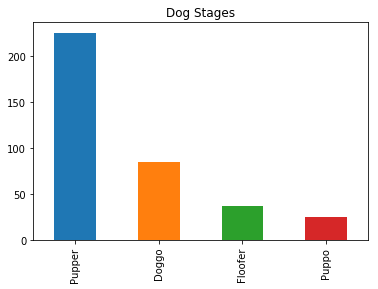

In [89]:
# Hist of the dog stage
twitter_archive_master.dog_stage[twitter_archive_master.dog_stage != 'Family'].value_counts().plot(kind='bar', title = 'Dog Stages');

Most of the user seems to share pupper images

In [90]:
# Most owned breeds
dog_breed_count = twitter_archive_master.groupby(['dog_breed'])['tweet_id'].count()
common_dog_breed = dog_breed_count[dog_breed_count>20]

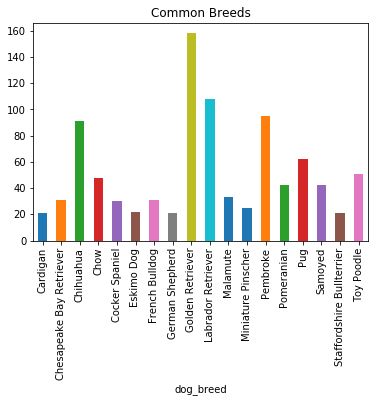

In [91]:
common_dog_breed.plot(kind='bar',title='Common Breeds');

It seems that most of the users own Golden Retriever and Labrador Retriever dog

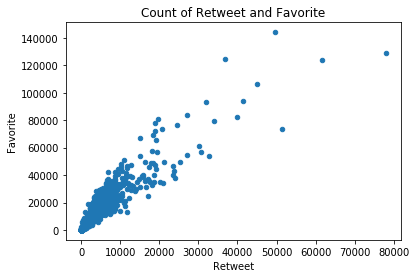

In [92]:
# plot the retweet count and favorit count
twitter_archive_master.plot(kind='scatter', x='retweet_count', y='favorite_count')
plt.ylabel('Favorite')
plt.xlabel('Retweet')
plt.title('Count of Retweet and Favorite')
plt.show();

In [93]:
linregress(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)

LinregressResult(slope=2.4276658410824403, intercept=2117.254022819612, rvalue=0.9161581370183131, pvalue=0.0, stderr=0.02278424987879679)

There is a very strong relationship between the retweet count and favorite count that exceed 90%